# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              


import warnings
warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv(r'D:\1 Катя\1 курсы\Аналитика\Задания\DA_2.3_att\HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


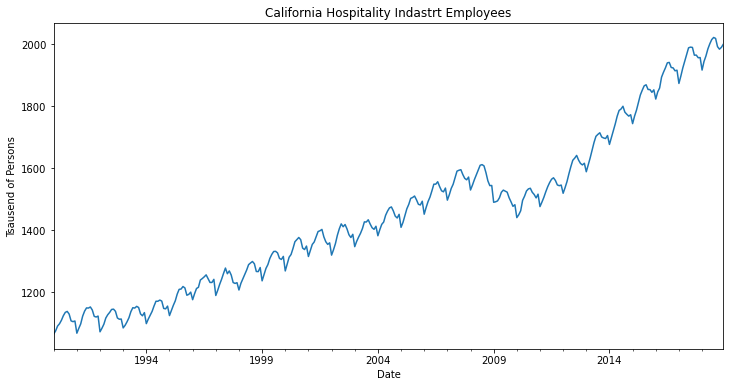

In [7]:
## 
title = 'California Hospitality Indastrt Employees'
ylabel='Tsausend of Persons'
ax = df['Employees'].plot(figsize=(12,6), title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);


In [20]:
# 

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').

In [8]:
r = seasonal_decompose(df['Employees'],model='additive')

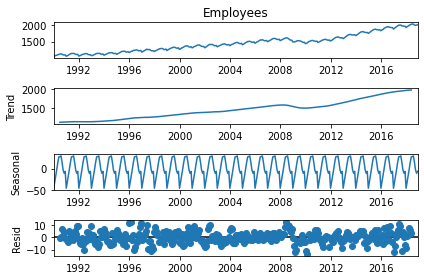

In [9]:
r.plot();

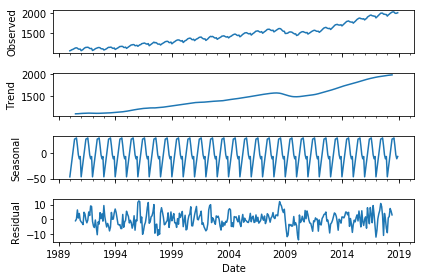

In [3]:
# 

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [10]:
auto_arima(df['Employees'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Wed, 22 Dec 2021   AIC                           2208.504
Time:                                      20:50:28   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
### 4. Разделите данные на train/test 
Установите один год (12 записей) для тестирования. Есть несколько способов сделать это!

In [21]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train

In [22]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 22 Dec 2021   AIC                           2196.814
Time:                                    21:39:44   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 22 Dec 2021   AIC                           2196.814
Time:                                    21:39:49   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model = SARIMAX(test['Employees'],order=(0, 1, 0),seasonal_order=(1, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                   12
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -46.505
Date:                            Wed, 22 Dec 2021   AIC                             97.010
Time:                                    21:57:53   BIC                             97.806
Sample:                                01-01-2018   HQIC                            96.509
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0094   7.02e+06  -1.34e-09      1.000   -1.38e+07    1.38e+07
sigma2       275.1961   3.63e+07   7.59e-06      1.000   -7.11e+07    7.11e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.44   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.02   Prob(JB):                         0.48
Heteroskedasticity (H):               0.49   Skew:                            -0.89
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [48]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(0, 1, 0)x(2, 0, 0, 12)')

In [45]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Employees'][i]}")

predicted=2003.815571, expected=1916.8
predicted=2003.815571, expected=1944.5
predicted=2003.815571, expected=1962.2
predicted=2003.815571, expected=1984.9
predicted=2003.815571, expected=2001.5
predicted=2003.815571, expected=2015.3
predicted=2003.815571, expected=2022.1
predicted=2003.815571, expected=2019.1
predicted=2003.815571, expected=1992.5
predicted=2003.815571, expected=1984.3
predicted=2003.815571, expected=1990.1
predicted=2003.815571, expected=2000.2


### 7. Нарисуйте графики прогнозируемых и известных значений


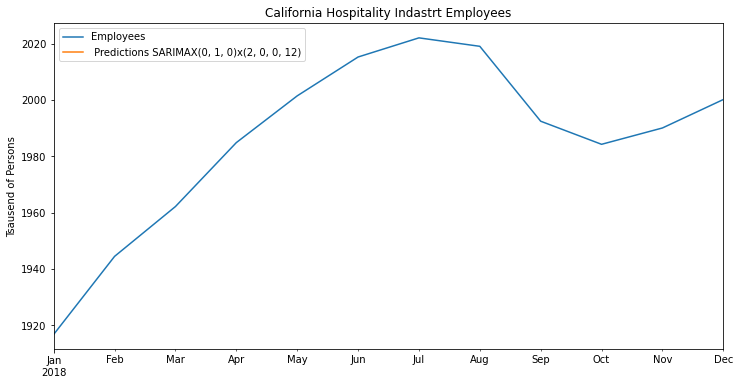

In [53]:
title = 'California Hospitality Indastrt Employees'
ylabel='Tsausend of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, xlim=['2018-01-01', '2018-12-01'], ylabel=ylabel);


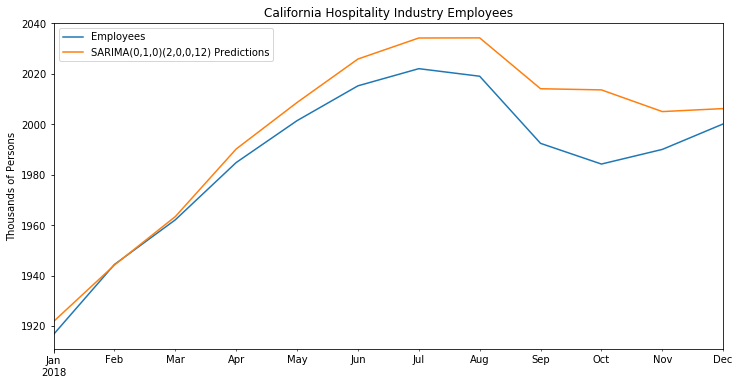

### 8. Оцените качество модели с помощью MSE и RMSE


In [57]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {error1:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {error2:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 1080.021215
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 32.86367623


SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [58]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Wed, 22 Dec 2021   AIC                           2208.504
Time:                                      22:02:57   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) ')

### 10. Постройте график предсказаний и график исходных данных


<AxesSubplot:>

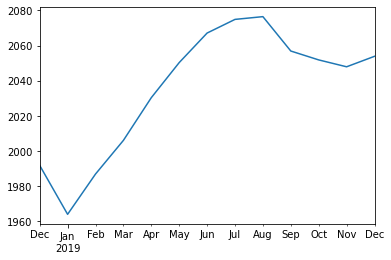

In [60]:
fcast.plot()
# df['Employees'][-1]

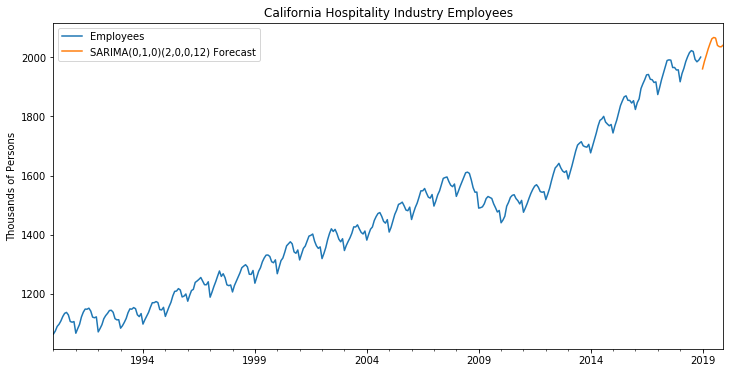

### Бонус: воспользуйтесь библиотекой Prophet для предсказания на 1 год вперед